# The PyConTurb interpolator

The PyConTurb `interpolator` function is based upon SciPy's `griddata` function, but it has been expanded so that it can also handle just a single point or points that fall within a line. This interpolator is what lies underneath the data profiles given in the next example. More documentation on the interpolator can be found in the Reference Guide section.

This example has the following sections:  

* [Preliminaries](#Preliminaries:-importing/defining-functions)  

* [Interpolator logic](#Interpolator-logic)  

* [Case 1: One Point](#Case-1:-One-Point)  

* [Case 2: Line](#Case-2:-Line)  

* [Case 3: Polygon](#Case-3:-Polygon)  

## Preliminaries: imports and definitions

We first import required functions and set a few notebook-specific functions/variables.

In [1]:
%matplotlib inline
from pathlib import Path

import matplotlib.pyplot as plt  # matplotlib for some plotting
import numpy as np  # numeric python functions

from pyconturb._utils import interpolator  # the interpolator function

from _nb_utils import plot_interp

## Interpolator logic

The interpolator logic is as follows:  

1. **One point**. If one point is passed in, it returns the value from that point.  
2. **Line**. If multiple points are passed in and they fall in a line, it projects the requested points onto the line and uses NumPy's `interp` function along the line.  
3. **Polygon**. If multiple points are passed in and they do not fall in a line, it interpolates the points inside the polygon using linear ND interpolation and extrapolates the points outside the polygon using the "nearest" option.

Let's see how this looks in practice using some examples.

## Case 1: One Point

If there is one point given, the interpolator returns that point's value.

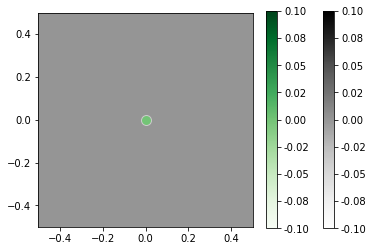

In [2]:
yp, zp, valp = np.zeros((3, 1))  # points/values to be interpolated
y, z = np.meshgrid(np.linspace(-0.5, 0.5), np.linspace(-0.5, 0.5))  # points we want to query
val = interpolator((yp, zp), valp, (y.flatten(), z.flatten()))  # returns y.size array of points
plot_interp(yp, zp, valp, y, z, val)  # plot the interpolated values

## Case 2: Line

### Line 1: Vertical line

The interpolator interpolates the values in the vertical direction.

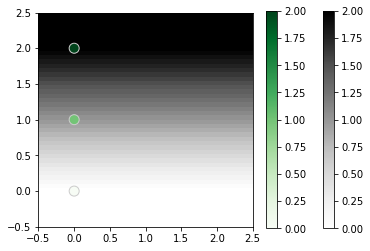

In [3]:
yp, zp, valp = np.zeros(3), np.arange(3), np.arange(3)  # points/values to be interpolated
y, z = np.meshgrid(np.linspace(-0.5, 2.5), np.linspace(-0.5, 2.5))  # points we want to query
val = interpolator((yp, zp), valp, (y.flatten(), z.flatten()))  # returns y.size array of points
plot_interp(yp, zp, valp, y, z, val)  # plot the interpolated values

### Line 2: Horizontal line

The interpolator interpolates the values in the horizontal direction.

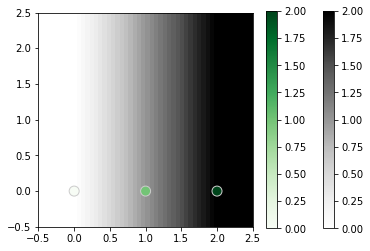

In [4]:
yp, zp, valp = np.arange(3), np.zeros(3), np.arange(3)  # points/values to be interpolated
y, z = np.meshgrid(np.linspace(-0.5, 2.5), np.linspace(-0.5, 2.5))  # points we want to query
val = interpolator((yp, zp), valp, (y.flatten(), z.flatten()))  # returns y.size array of points
plot_interp(yp, zp, valp, y, z, val)  # plot the interpolated values

### Line 3: Diagonal line

The interpolator projects the points onto the line and then interpolates along the line.

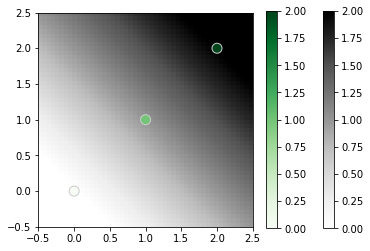

In [5]:
yp, zp, valp = np.arange(3), np.arange(3), np.arange(3)  # points/values to be interpolated
y, z = np.meshgrid(np.linspace(-0.5, 2.5), np.linspace(-0.5, 2.5))  # points we want to query
val = interpolator((yp, zp), valp, (y.flatten(), z.flatten()))  # returns y.size array of points
plot_interp(yp, zp, valp, y, z, val)  # plot the interpolated values

## Case 3: Polygon

The interpolator interpolates the points that follow within the polygon linearly. The points outside the polygon are extrapolated by taking the same value as their nearest neighbor.

**Note**: as you can see below, this logic can lead to undesirable discontinuities for points outside the polygon. Use this interpolator with caution when you have a polygon of points and are trying to extrapolate.

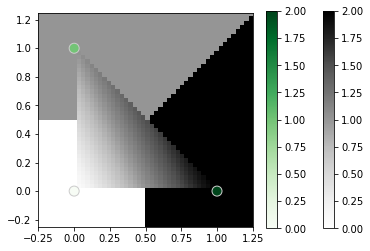

In [6]:
yp, zp, valp = [0, 0, 1], [0, 1, 0], np.arange(3)  # points/values to be interpolated
y, z = np.meshgrid(np.linspace(-0.25, 1.25), np.linspace(-0.25, 1.25))  # points we want to query
val = interpolator((yp, zp), valp, (y.flatten(), z.flatten()))  # returns y.size array of points
plot_interp(yp, zp, valp, y, z, val)  # plot the interpolated values